<h1 align="center">Lab 5: Decision Trees for Classification and Regression</h1>

---
## Problem A

The goal of this problem is to predict the number of occupants in a room using data obtained from multiple non-intrusive environmental sensors like temperature, light, sound, CO2, and passive infrared (PIR).
1. **Algorithm to be used**: Decision Trees
2. **Dataset**: `Occupancy Estimation.csv`

Following is the description of columns in `Occupancy Estimation.csv` file:
<TABLE CAPTION="Room Occupancy">
<TR><TD><B>Name</B></TD><TD><B>Description</B></TD></TR>
<TR><TD>Temperature</TD><TD>In degree Celsius</TD></TR>
<TR><TD>Light</TD><TD>In Lux</TD></TR>
<TR><TD>Sound</TD><TD>In Volts</TD></TR>
<TR><TD>CO2</TD><TD>In PPM</TD></TR>
<TR><TD>CO2 Slope</TD><TD>Slope of CO2 values taken in a sliding window</TD></TR>
<TR><TD>PIR</TD><TD>Binary value conveying motion detection</TD></TR>   
<TR><TD>Room Occupancy Count (outcome)</TD><TD>Number of occupants in the room</TD></TR>
</TABLE>

Sensor nodes S1-S4 consist of temperature, light and sound sensors, S5 has a CO2 sensor and S6 and S7 have one PIR sensor each that are deployed on the ceiling ledges at an angle that maximize the sensor field of view for motion detection.

#### Import Packages

In [199]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import StratifiedKFold # For creating folds

# Import Package to implement GridSearch CV (Hyperparameter Tuning Method 1)
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV (Hyperparameter Tuning Method 2)
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### 1. Import `Occupancy Estimation.csv` file and check if the dataset is balanced/imbalanced with respect to the target variable (Room Occupancy Count).

In [200]:
room = pd.read_csv('Occupancy_Estimation.csv')
room.head(20)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
6,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
8,25.00,24.81,24.56,25.50,122,35,56,43,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1
9,25.00,24.81,24.56,25.50,101,34,57,43,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1


#### 2. With Room Occupancy Count as the outcome, implement a Decision Tree model and identify its optimal values of hyperparameters (`max_depth`, `min_samples_split`, and `min_samples_leaf`) using Grid Search CV.

**NOTE**: Consider test data size to be 40% and the number of folds to be 3. Use `f1_macro` as the scoring metric.

In [201]:
X = room.drop(columns=['Room_Occupancy_Count'])
y = room['Room_Occupancy_Count']

In [202]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [203]:
classifier = DecisionTreeClassifier(random_state = 40)

# Ranges for hyperparameters
hyper_params = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [20, 40, 60],
    'min_samples_split': [10, 20, 30, 40, 100]
}

# Creating folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100) #same 100 observations, setup random state

In [204]:
model_cv = GridSearchCV(estimator = classifier,
                        param_grid = hyper_params,
                        scoring= 'f1_macro', #r2 for regression or rmse
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs


# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Training time: 2.449739694595337s


In [205]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.9453986220610706
Improved parameters:  {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [206]:
hyper_params_new = {
    'max_depth': list(range(6, 14)),
    'min_samples_leaf': list(range(16, 24)),
    'min_samples_split': list(range(6, 14))
}

In [207]:
model_cv = GridSearchCV(estimator = classifier,
                        param_grid = hyper_params_new,
                        scoring= 'f1_macro', #r2 for regression or rmse
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs

start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
Training time: 21.7039794921875s


In [208]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.9600295711832104
Improved parameters:  {'max_depth': 7, 'min_samples_leaf': 18, 'min_samples_split': 6}


#### 3. Create a visualization of the best decision tree (the one with the optimal values of hyperparameters)

In [209]:
# Storing best model
bestClassTree = model_cv.best_estimator_
print(bestClassTree)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=18, min_samples_split=6,
                       random_state=40)


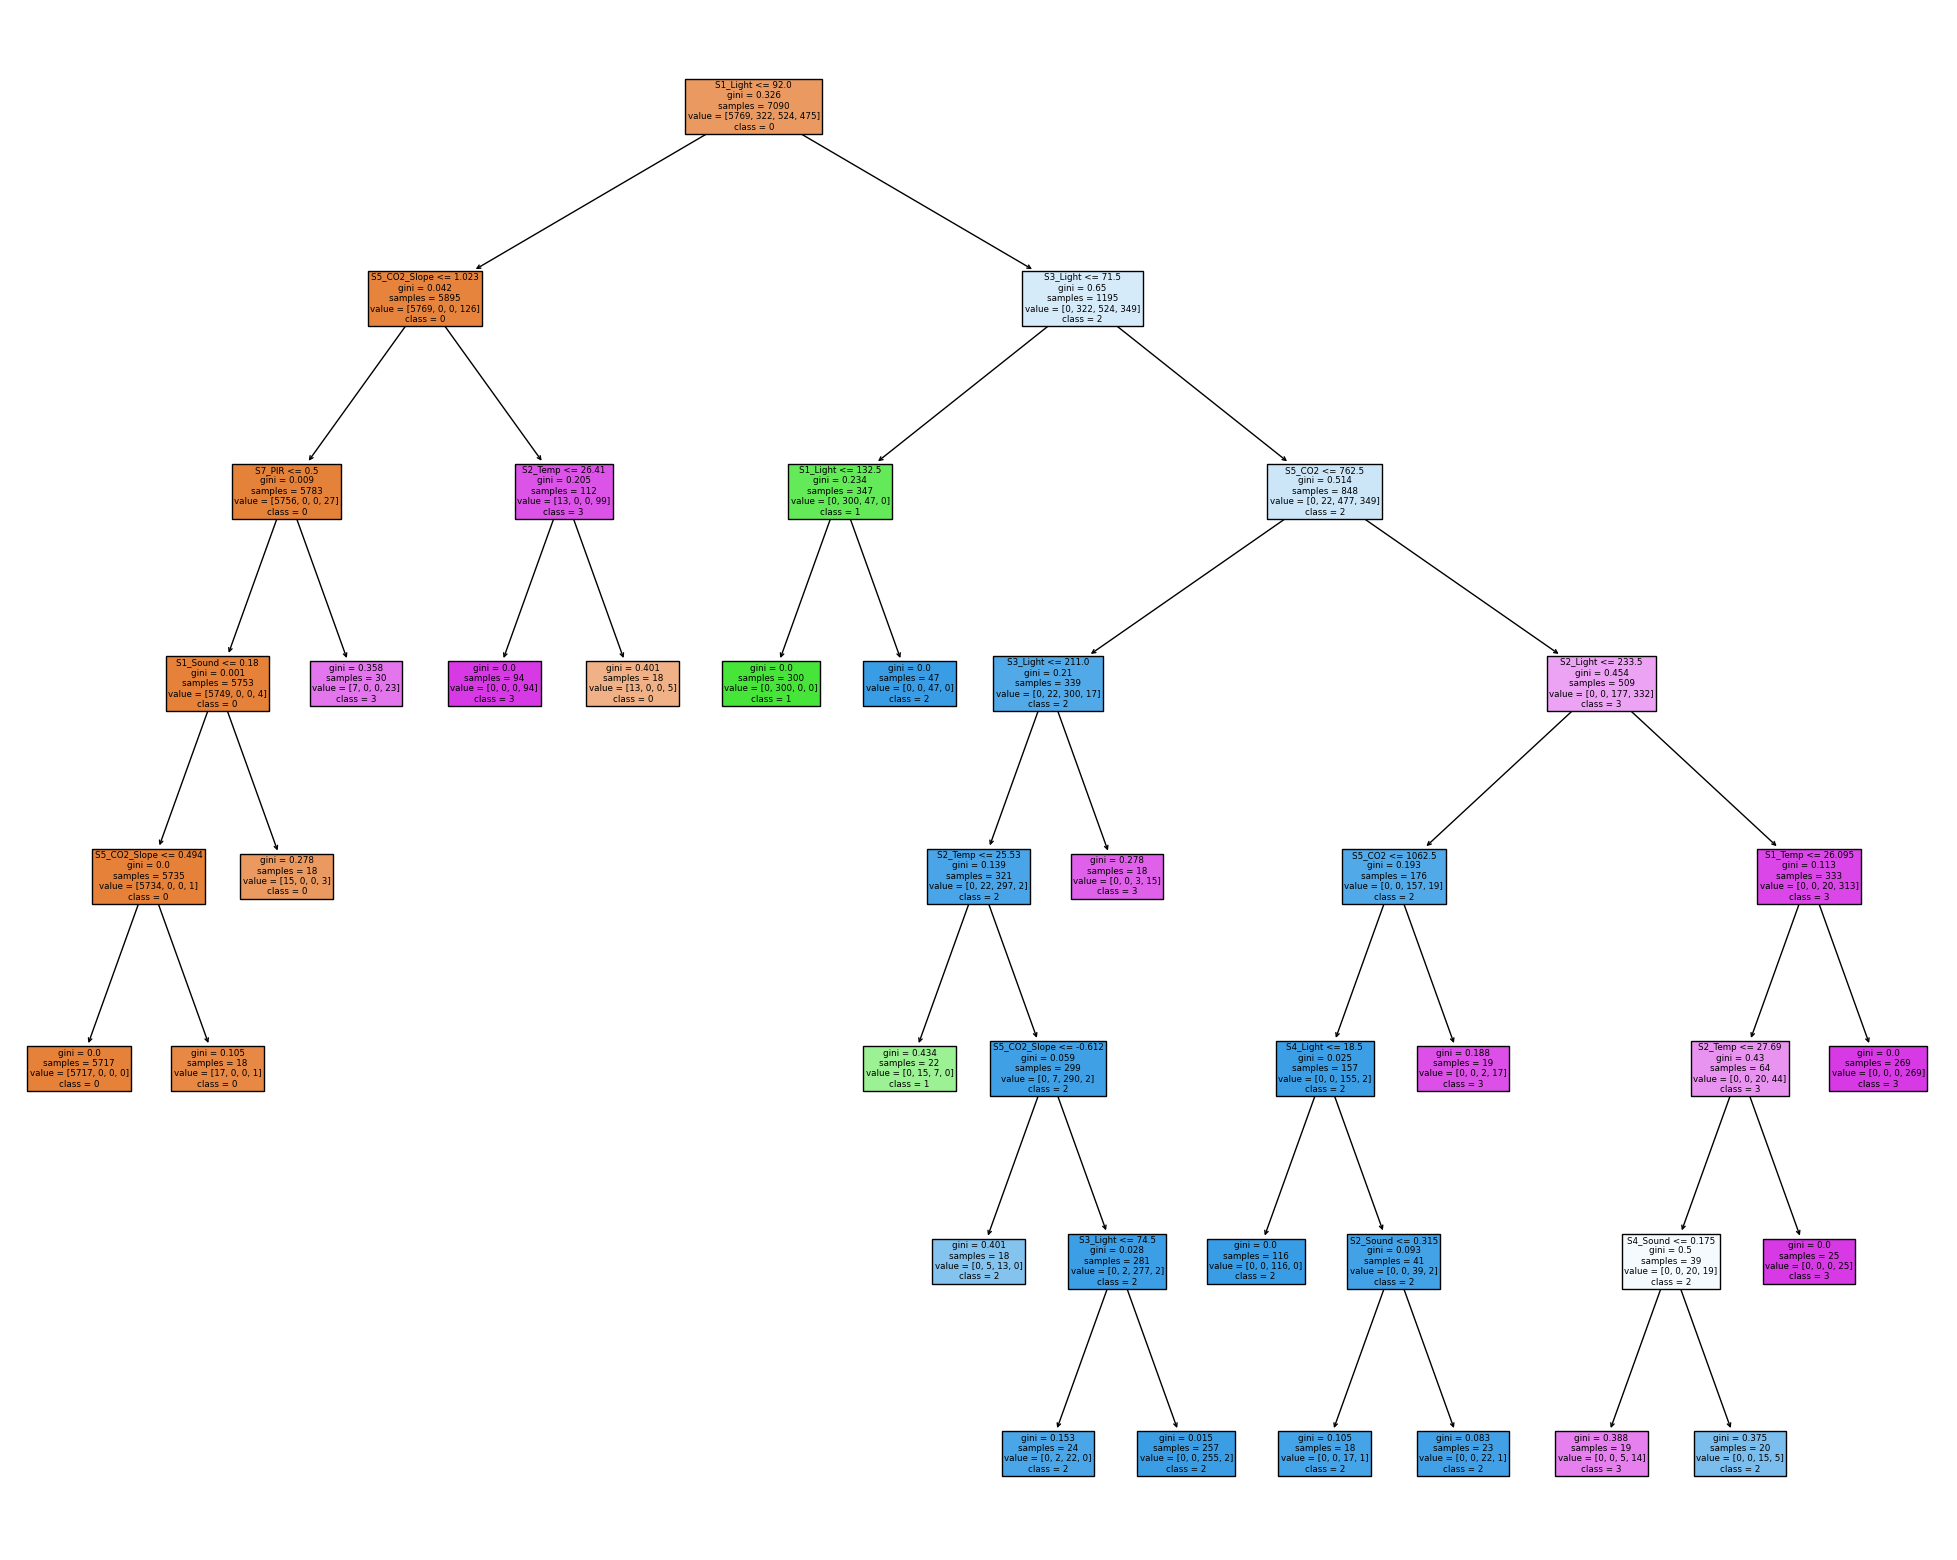

In [210]:
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = bestClassTree,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = ['0', '1', '2', '3'],
                   filled = True)

#### 4. Generate a confusion matrix and a classification report to evaluate the performance of tuned model on train set.

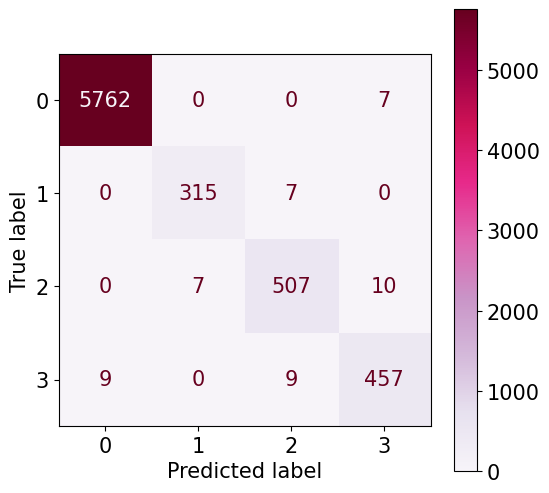

In [211]:
# First make predictions on train set
y_pred_train = model_cv.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, y_pred_train, labels = model_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_cv.classes_)

# Specify figure size and font size
fig, ax = plt.subplots(figsize = (6, 6))
plt.rcParams.update({'font.size': 15})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

#### 5. Generate a confusion matrix and a classification report to evaluate the performance of tuned model on test set.

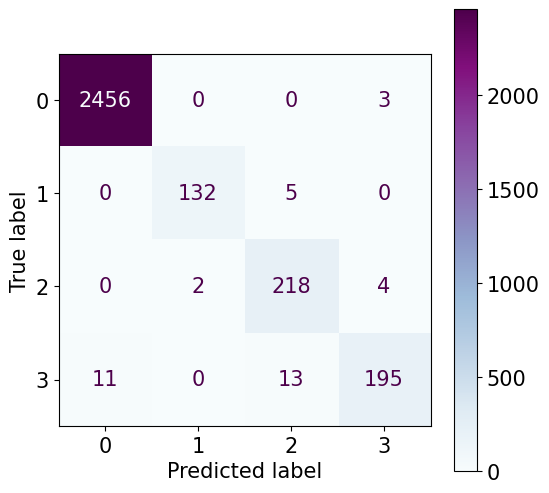

In [212]:
# Predictions on test set
y_pred = model_cv.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = model_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_cv.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (6, 6))

# Display Confusion Matrix
disp.plot(cmap = 'BuPu', ax = ax);

#### 6. Print the values of macro averaged F1 score for both train and test sets. Report your observation in terms of whether the model is underfitting or overfitting.

In [213]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.995541,0.985075,0.923729,0.965347,0.987496,0.967423,0.987600
recall,0.998780,0.963504,0.973214,0.890411,0.987496,0.956477,0.987496
f1-score,0.997158,0.974170,0.947826,0.926366,0.987496,0.961380,0.987384
support,2459.000000,137.000000,224.000000,219.000000,0.987496,3039.000000,3039.000000


In [214]:
report = classification_report(train_y, y_pred_train, output_dict = True)
report_df = pd.DataFrame(report)
report_df

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.998440,0.978261,0.969407,0.964135,0.993089,0.977561,0.993080
recall,0.998787,0.978261,0.967557,0.962105,0.993089,0.976678,0.993089
f1-score,0.998614,0.978261,0.968481,0.963119,0.993089,0.977119,0.993084
support,5769.000000,322.000000,524.000000,475.000000,0.993089,7090.000000,7090.000000


Since the training data will always do better than the testing data, we would expect to see an f1 score that is smaller for our testing data. 0.961 compared to 0.977 does not seem like it would present a significant difference, so the model does not seem to be significantly over or underfitting.

#### 7. Using the tuned model, generate a bar plot to show the importance of input features in occupancy estimation.

NOTE: Consider only the features that have importance scores of at least 5%.

What is the total percentage of reduction in Gini impurity caused by these features.

In [215]:
importance = bestClassTree.feature_importances_
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])
feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)
feature_imp = feature_imp[feature_imp['Importance'] >= 0.05]
feature_imp

,Feature,Importance
0,S1_Light,0.612664
1,S3_Light,0.126047
2,S5_CO2_Slope,0.077168
3,S5_CO2,0.071489
4,S2_Light,0.071347


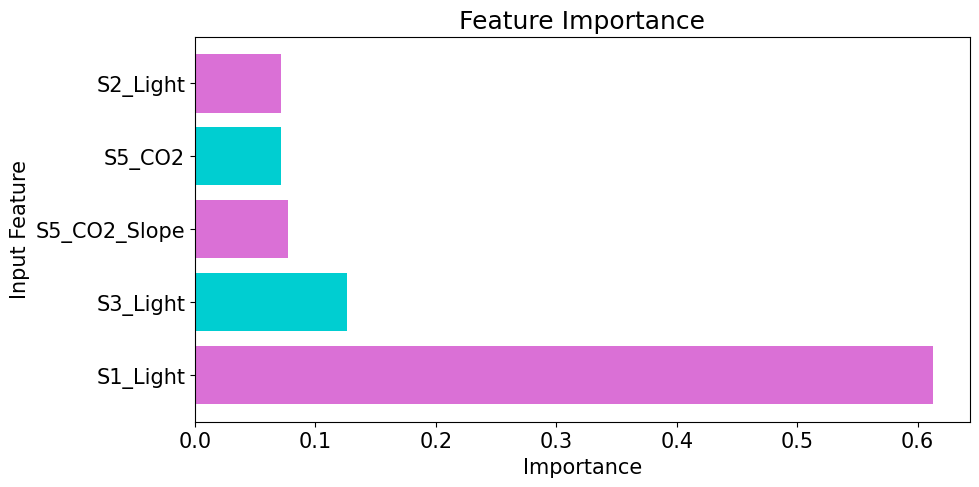

In [216]:
plt.figure(figsize=(10, 5), dpi = 100)
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['orchid', 'darkturquoise'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");

#### 8. Implement Randomized Search Cross Validation to identify the near optimal values of hyperparameters by considering `n_iter = 60`.

Does the values matche with the ones obtained while implementing Grid Search Cross Validation?

In [217]:
hyper_params_new = {
    'max_depth': list(range(2, 12)),
    'min_samples_leaf': list(range(2, 12)),
    'min_samples_split': list(range(15, 24))
}

# Creating folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100) #same 100 observations, setup random state

In [218]:
random_model_cv = RandomizedSearchCV(estimator = classifier,
                                     param_distributions = hyper_params_new,
                                     scoring = 'f1_macro',
                                     cv = folds,
                                     verbose = 1,
                                     n_jobs = -1,
                                     n_iter = 60,
                                     random_state = 100)

start = time.time()            # Start Time
random_model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Training time: 2.363431453704834s


In [219]:
print(random_model_cv.best_params_)
print(random_model_cv.best_score_)

{'min_samples_split': 19, 'min_samples_leaf': 2, 'max_depth': 7}
0.9795997360524273


Our first Grid Search returned max_depth=7, min_samples_leaf=15, min_samples_split=5 as the best model using that. Randomized search returned max_depth=7, min_samples_leaf=2, min_samples_split=19. We know max depth 7 gives us the optimal tree, but there seems to be some disagreement for minimum sample split and minimum samples of the leaf.

#### 9. Implement adaptive strategy of hyperparameter tuning (combining Randomized and Grid Search Cross Validation) to find the optimal values of hyperparameters.

In [220]:
hyper_params = {
    'max_depth': list(range(1, 20)),
    'min_samples_leaf': list(range(1, 60)),
    'min_samples_split': list(range(1, 60))
}

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100) #same 100 observations, setup random state

In [221]:
random_model_cv = RandomizedSearchCV(estimator = classifier,
                                     param_distributions = hyper_params_new,
                                     scoring = 'f1_macro',
                                     cv = folds,
                                     verbose = 1,
                                     n_jobs = -1,
                                     n_iter = 60,
                                     random_state = 100)

start = time.time()            # Start Time
random_model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Training time: 2.336263418197632s


In [222]:
print(random_model_cv.best_params_)
print(random_model_cv.best_score_)

{'min_samples_split': 19, 'min_samples_leaf': 2, 'max_depth': 7}
0.9795997360524273


In [223]:
hyper_params_new = {
    'max_depth': list(range(3, 11)),
    'min_samples_leaf': list(range(2, 6)),
    'min_samples_split': list(range(15, 23))
}

In [224]:
model_cv = GridSearchCV(estimator = classifier,
                        param_grid = hyper_params_new,
                        scoring= 'f1_macro',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs

start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 256 candidates, totalling 768 fits
Training time: 11.591403484344482s


In [225]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.980434362573613
Improved parameters:  {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 15}


#### 10. Report your observations in terms of number of experiments required to reach the optimal values of hyperparameters using Grid Search CV in comparison to the Adaptive Strategy.

Write your observation:


In the Grid Search, we did 1716 experiments to get a smaller f1 macro score (0.96), but with the adaptive, we got a higher f1 macro score with only 948 experiments(0.98).

---
## Problem B

<img src="https://media.istockphoto.com/id/618973378/photo/bicycle-sharing-system.jpg?s=612x612&w=0&k=20&c=ms8wYi_uOo2YgghfJiXeIq073M15Dyoc7dEau9qDFOE=" width="400" style="float: center"/>

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental, and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Today, there exists great interest in these systems due to their important role in traffic, environmental, and health issues.


**In this case study, the objective is to predict the daily count of users renting bikes using weather and seasonal information.**

Data to be used: *bike.csv*

Following is the description of columns in *bike.csv* file

<TABLE CAPTION="Bike Sharing Dataset">
<TR><TD><B>Variable</B></TD><TD><B>Description</B></TD></TR>
<TR><TD>season</TD><TD>season (1:winter, 2:spring, 3:summer, 4:fall)</TD></TR>
<TR><TD>yr</TD><TD>year (0: 2011, 1:2012)</TD></TR>
<TR><TD>mnth</TD><TD>month (1 to 12)</TD></TR>
<TR><TD>holiday</TD><TD>whether day is holiday or not </TD></TR>
<TR><TD>weekday</TD><TD>day of the week</TD></TR>
<TR><TD>workingday</TD><TD>if day is neither weekend nor holiday is 1, otherwise is 0</TD></TR>   
<TR><TD>weathersit</TD><TD>Weather Situation (1,2,3,4)**</TD></TR>
<TR><TD>temp</TD><TD>Normalized temperature in Celsius</TD></TR>
<TR><TD>atemp</TD><TD>Normalized feeling temperature in Celsius</TD></TR>
<TR><TD>hum</TD><TD>Normalized humidity</TD></TR>
<TR><TD>windspeed</TD><TD>Normalized wind speed</TD></TR>
<TR><TD>cnt (outcome)</TD><TD>Count of users renting bikes</TD></TR>
</TABLE>

** For Weather Situation (variable: weathersit), following are the possibilites:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### 1. With cnt as the outcome, implement a Decision Tree model and identify its optimal values of hyperparameters using adaptive strategy of hyperparameter tuning. Consider test data size to be 20%, number of folds to be 3, and scoring metric to be `r2`.

**NOTE**: To implement Decision Tree Regressor, import the following library on your Colab Notebook:

`from sklearn.tree import DecisionTreeRegressor`

In [226]:
bike = pd.read_csv('bike.csv')
bike.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


In [227]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [228]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

In [229]:
X = bike.drop(columns=['cnt'])
y = bike['cnt']

cat_var = ['season', 'yr', 'holiday', 'weekday']
X_encoded = pd.get_dummies(X, columns = cat_var)
X_encoded.head()

,mnth,workingday,weathersit,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,yr_1,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,2,0.344167,0.363625,0.805833,0.160446,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,2,0.363478,0.353739,0.696087,0.248539,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,1,1,0.196364,0.189405,0.437273,0.248309,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,1,0.200000,0.212122,0.590435,0.160296,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,1,0.226957,0.229270,0.436957,0.186900,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [230]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 1)

In [231]:
hyper_params = {
    'max_depth': list(range(1, 20)),
    'min_samples_leaf': list(range(1, 60)),
    'min_samples_split': list(range(1, 60))
}

folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

In [232]:
regressor = DecisionTreeRegressor(random_state=100)

In [233]:
random_model_cv = RandomizedSearchCV(estimator = regressor,
                                     param_distributions = hyper_params,
                                     scoring = 'r2',
                                     cv = folds,
                                     verbose = 1,
                                     n_jobs = -1,
                                     n_iter = 60,
                                     random_state = 100)

start = time.time()
random_model_cv.fit(train_X, train_y)
stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Training time: 1.2580666542053223s


In [234]:
print(random_model_cv.best_params_)
print(random_model_cv.best_score_)

{'min_samples_split': 4, 'min_samples_leaf': 7, 'max_depth': 7}
0.7797007312590619


In [235]:
hyper_params_new = {
    'max_depth': list(range(3, 12)),
    'min_samples_leaf': list(range(3, 12)),
    'min_samples_split': list(range(2, 7))
}

In [236]:
model_cv = GridSearchCV(estimator = regressor,
                        param_grid = hyper_params_new,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1)

start = time.time()
model_cv.fit(train_X, train_y)
stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
Training time: 8.941740274429321s


In [237]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.7840633185552367
Improved parameters:  {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2}


#### 2. Using the best Decision Tree model that is identified in the previous step, do the following:

- Evaluate the performance of model on test set using R2 and RMSE values.
- Generate a a bar plot to show the importance of input features with non-zero importance scores.

In [238]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [239]:
y_pred_train = model_cv.predict(train_X)
y_pred_test = model_cv.predict(test_X)

In [240]:
r2 = r2_score(train_y, y_pred_train)
rmse = mean_squared_error(train_y, y_pred_train, squared=False)
[r2, rmse]

[0.9449470307958769, 452.5219558929221]

In [241]:
r2 = r2_score(test_y, y_pred_test)
rmse = mean_squared_error(test_y, y_pred_test, squared=False)
[r2, rmse]

[0.8608388491623479, 717.1319659036869]

I would consider the difference in R2 values to be slightly significant, so since 0.861 for testing is less than 0.945 for training, we could say the model is possibly underfitting our data.

In [242]:
importance = (model_cv.best_estimator_).feature_importances_
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])
feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)
feature_imp = feature_imp[feature_imp['Importance'] > 0.001] #the smaller values barely have bars on graph
feature_imp

,Feature,Importance
0,temp,0.410724
1,yr_0,0.317080
2,hum,0.073568
3,season_1,0.044702
4,atemp,0.038775
5,season_4,0.036672
6,mnth,0.030258
7,weathersit,0.018243
8,windspeed,0.015923
9,weekday_0,0.005222


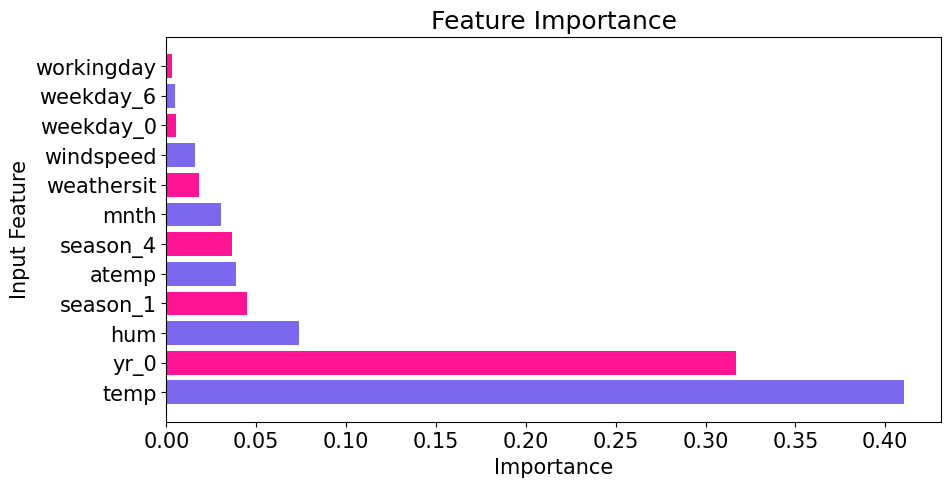

In [243]:
plt.figure(figsize=(10, 5), dpi = 100)
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['mediumslateblue', 'deeppink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");